In [2]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
import panel as pn
import numpy as np
%matplotlib inline

In [3]:
file_path = Path("housing.csv")
sfo_housing = pd.read_csv(file_path)
sfo_housing.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Fill missing values in 'total_bedrooms' with the median value of the column
median_bedrooms = sfo_housing['total_bedrooms'].median()
sfo_housing['total_bedrooms'].fillna(median_bedrooms, inplace=True)
print("Missing values in 'total_bedrooms' filled with median:", median_bedrooms)


Missing values in 'total_bedrooms' filled with median: 435.0


In [5]:
# If 'ocean_proximity' contains specific tags for San Francisco, use:
sf_housing = sfo_housing[sfo_housing['ocean_proximity'].str.contains("NEAR BAY")]

# Alternatively, use geographical bounds specific to San Francisco if applicable
# sf_housing = sfo_housing[(sfo_housing['latitude'] >= lat_min) & (sfo_housing['latitude'] <= lat_max) &
#                          (sfo_housing['longitude'] >= lon_min) & (sfo_housing['longitude'] <= lon_max)]

print("Filtered San Francisco Housing Data:")
print(sf_housing.info())


Filtered San Francisco Housing Data:
<class 'pandas.core.frame.DataFrame'>
Index: 2290 entries, 0 to 19104
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2290 non-null   float64
 1   latitude            2290 non-null   float64
 2   housing_median_age  2290 non-null   float64
 3   total_rooms         2290 non-null   float64
 4   total_bedrooms      2290 non-null   float64
 5   population          2290 non-null   float64
 6   households          2290 non-null   float64
 7   median_income       2290 non-null   float64
 8   median_house_value  2290 non-null   float64
 9   ocean_proximity     2290 non-null   object 
dtypes: float64(9), object(1)
memory usage: 196.8+ KB
None


In [6]:
# Descriptive statistics for the dataset
print("Descriptive Statistics:")
print(sf_housing.describe())


Descriptive Statistics:
         longitude     latitude  housing_median_age   total_rooms  \
count  2290.000000  2290.000000         2290.000000   2290.000000   
mean   -122.260694    37.801057           37.730131   2493.589520   
std       0.147004     0.185434           13.070385   1830.817022   
min    -122.590000    37.350000            2.000000      8.000000   
25%    -122.410000    37.730000           29.000000   1431.250000   
50%    -122.250000    37.790000           39.000000   2083.000000   
75%    -122.140000    37.907500           52.000000   3029.750000   
max    -122.010000    38.340000           52.000000  18634.000000   

       total_bedrooms   population   households  median_income  \
count     2290.000000  2290.000000  2290.000000    2290.000000   
mean       513.491266  1230.317467   488.616157       4.172885   
std        366.351004   885.899035   350.598369       2.017427   
min          1.000000     8.000000     1.000000       0.499900   
25%        290.000000   

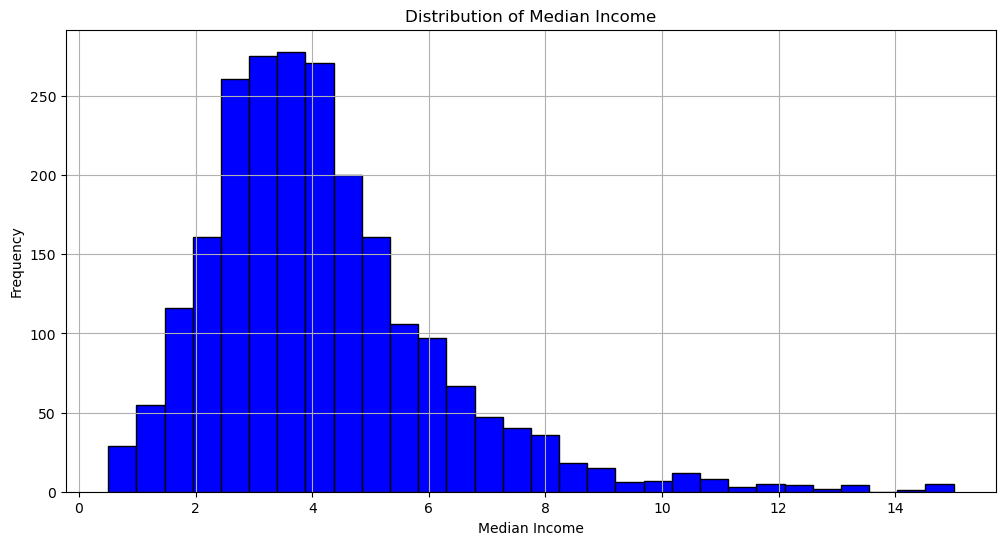

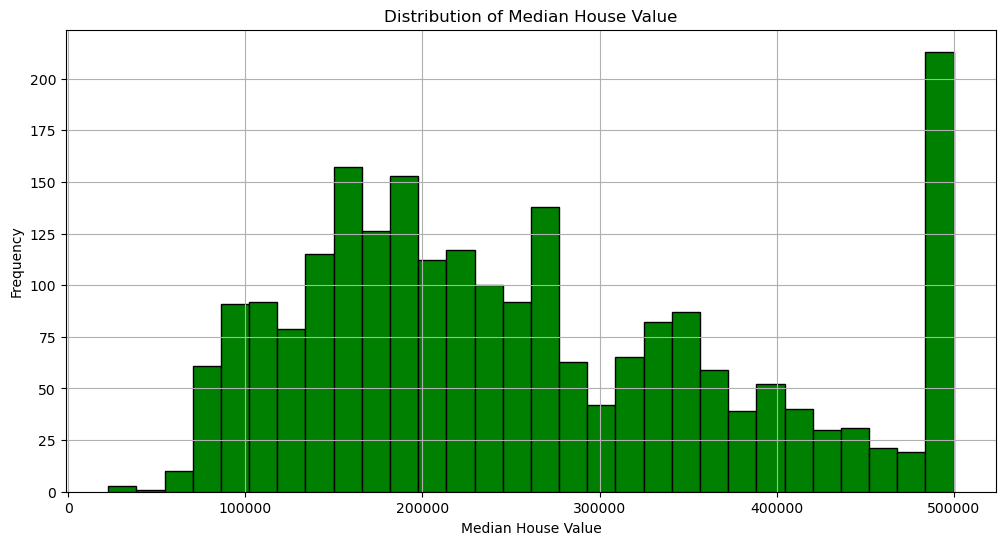

In [7]:
import matplotlib.pyplot as plt

# Plotting the distribution of Median Income
plt.figure(figsize=(12, 6))
plt.hist(sf_housing['median_income'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of Median House Value
plt.figure(figsize=(12, 6))
plt.hist(sf_housing['median_house_value'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


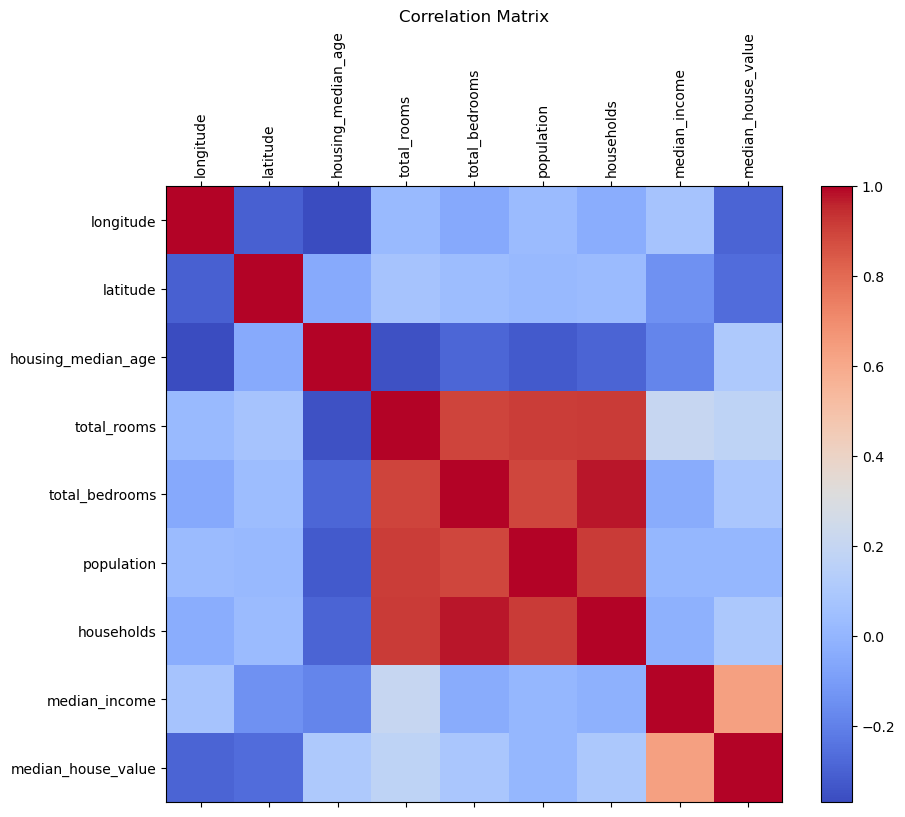

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Exclude non-numeric data for correlation calculation
numeric_sf_housing = sf_housing.select_dtypes(include=[np.number])

# Correlation matrix calculation
corr_matrix = numeric_sf_housing.corr()

# Plotting the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)

# Setting tick labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

plt.title('Correlation Matrix')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = sf_housing[['median_income', 'total_rooms', 'latitude', 'longitude']]
y = sf_housing['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")


Data split into training and testing sets.


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled.")


Features scaled.


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

print("Model trained and predictions made.")


Model trained and predictions made.


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 2929344549.2214074
R² Score: 0.8008510591077254


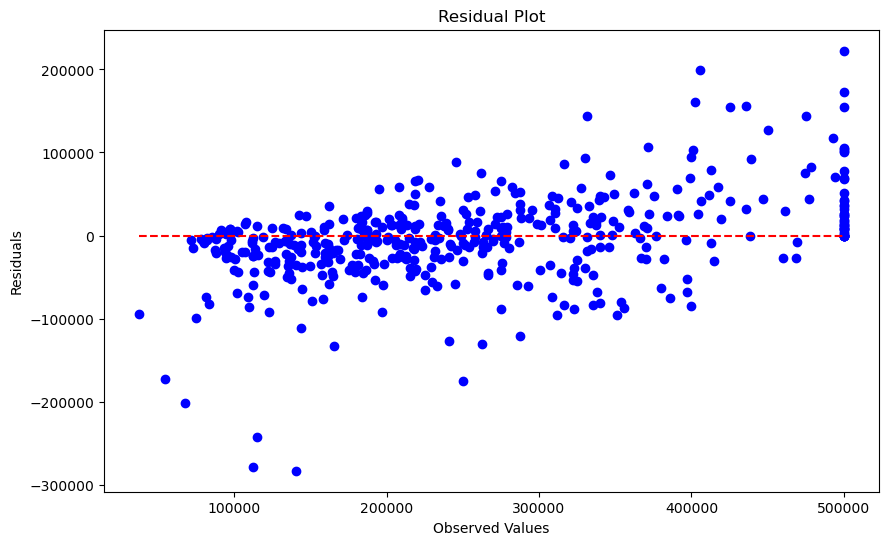

In [14]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), linestyles='dashed', colors='red')
plt.title('Residual Plot')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.show()


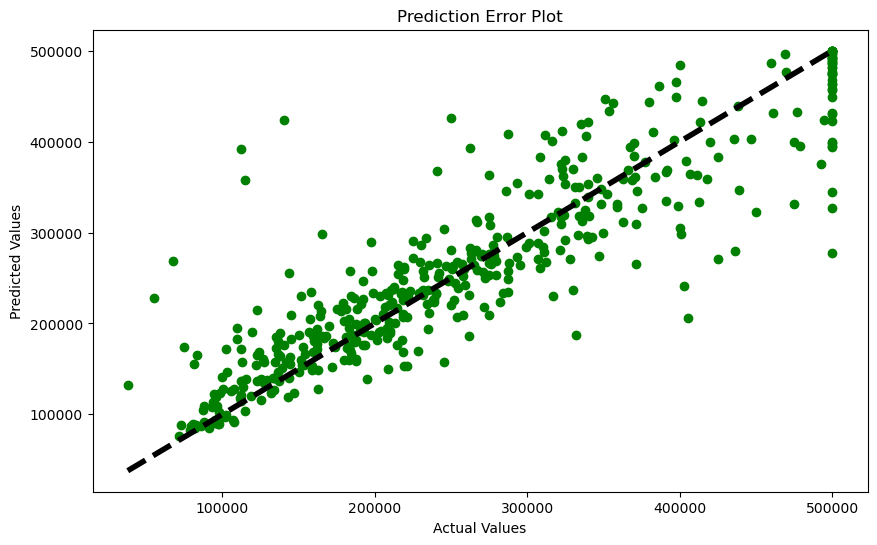

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line
plt.title('Prediction Error Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


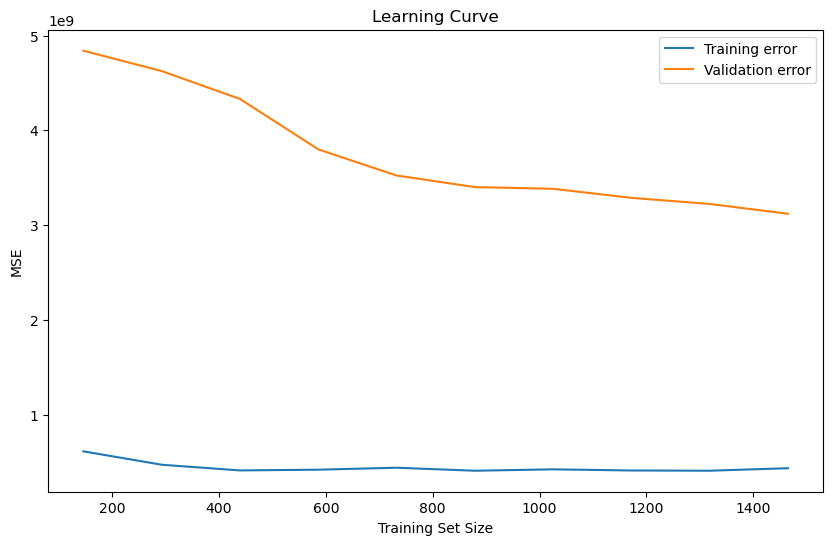

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [18]:
samples = X_test.sample(5, random_state=42)
actual_values = y_test.loc[samples.index]

# Display the selected samples with their actual median house values
print("Selected Samples for Prediction:")
print(samples)
print("\nActual Median House Values:")
print(actual_values)

Selected Samples for Prediction:
       median_income  total_rooms  latitude  longitude
1733          2.5863       2178.0     37.97    -122.35
1700          6.0666      15259.0     37.97    -122.27
174           2.2697        996.0     37.80    -122.24
1822          6.5160       1736.0     37.92    -122.29
18212         4.2188       3401.0     37.38    -122.06

Actual Median House Values:
1733     112200.0
1700     272400.0
174      127000.0
1822     401000.0
18212    500001.0
Name: median_house_value, dtype: float64


In [19]:
# Scale the samples using the same scaler used for training data
samples_scaled = scaler.transform(samples)

# Predict using the trained model
predicted_values = model.predict(samples_scaled)

# Display predicted values
print("\nPredicted Median House Values:")
print(predicted_values)



Predicted Median House Values:
[114753.   249697.   157771.   298319.01 277504.  ]


In [20]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual Values': actual_values, 'Predicted Values': predicted_values})
comparison_df['Difference'] = comparison_df['Predicted Values'] - comparison_df['Actual Values']

# Display the comparison
print("\nComparison of Actual and Predicted Values:")
print(comparison_df)



Comparison of Actual and Predicted Values:
       Actual Values  Predicted Values  Difference
1733        112200.0         114753.00     2553.00
1700        272400.0         249697.00   -22703.00
174         127000.0         157771.00    30771.00
1822        401000.0         298319.01  -102680.99
18212       500001.0         277504.00  -222497.00


<Figure size 1000x600 with 0 Axes>

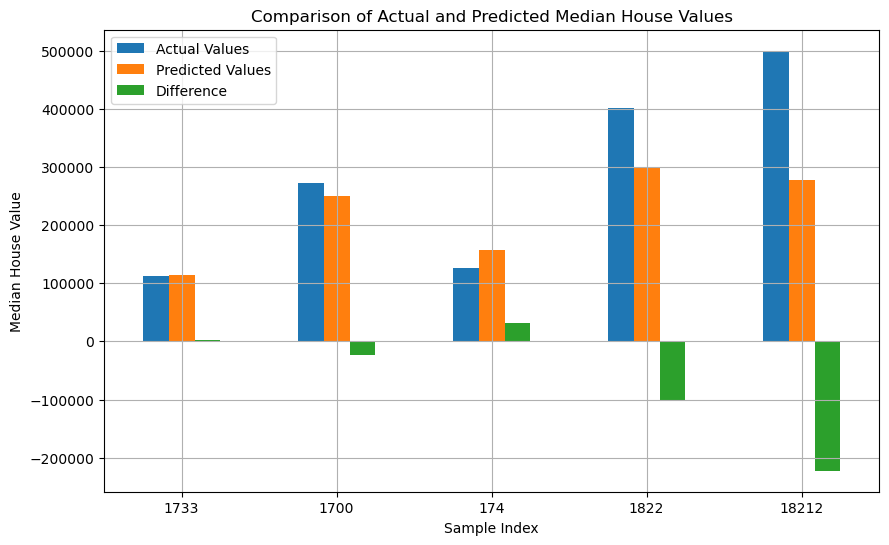

In [21]:
import matplotlib.pyplot as plt

# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Actual and Predicted Median House Values')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


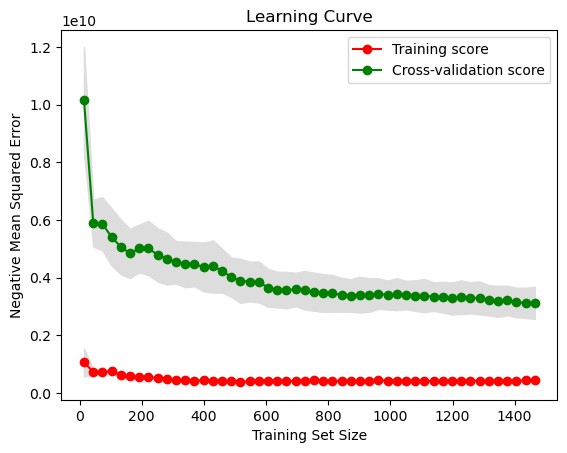

In [22]:
# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate mean and std
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = -test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plotting the learning curves
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.show()


In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [24]:
# Assuming X and y are already defined:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Initialize the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_reg.fit(X_train_scaled, y_train)


GradientBoostingRegressor(random_state=42)

In [26]:
# Predicting the Test set results
y_pred = gb_reg.predict(X_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 3052547056.21354
R² Score: 0.7924752438458171


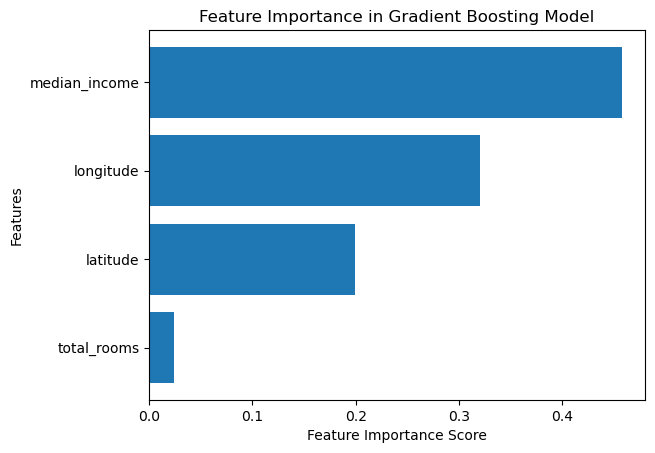

In [27]:
import matplotlib.pyplot as plt

feature_importances = gb_reg.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RandomForest Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# GradientBoosting Model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train_scaled, y_train)


GradientBoostingRegressor(random_state=42)

In [29]:
# Predictions
y_pred_rf = rf_reg.predict(X_test_scaled)
y_pred_gb = gb_reg.predict(X_test_scaled)

# Performance Evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Random Forest - Mean Squared Error: {mse_rf}, R² Score: {r2_rf}")
print(f"Gradient Boosting - Mean Squared Error: {mse_gb}, R² Score: {r2_gb}")


Random Forest - Mean Squared Error: 2929344549.2214074, R² Score: 0.8008510591077254
Gradient Boosting - Mean Squared Error: 3052547056.21354, R² Score: 0.7924752438458171


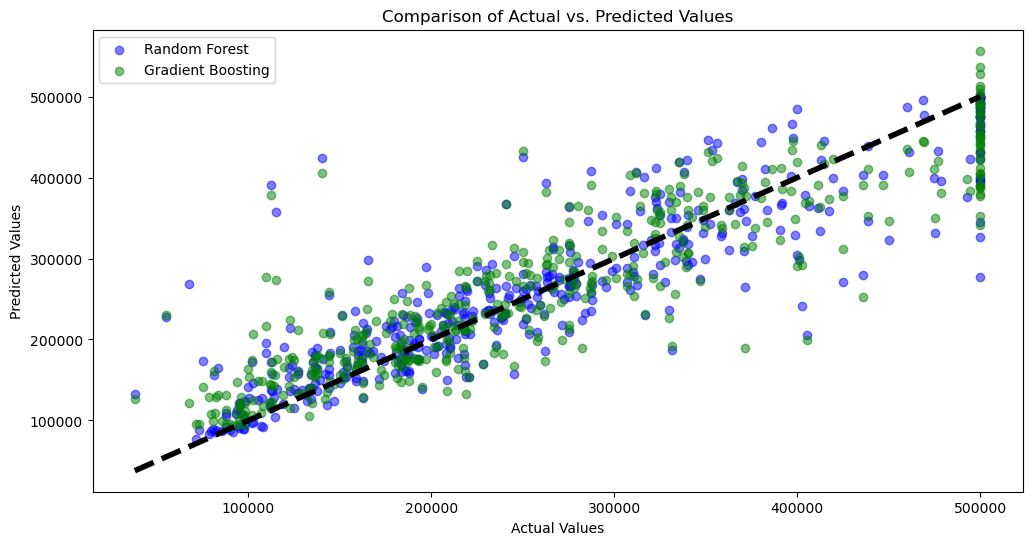

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_gb, color='green', alpha=0.5, label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Comparison of Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


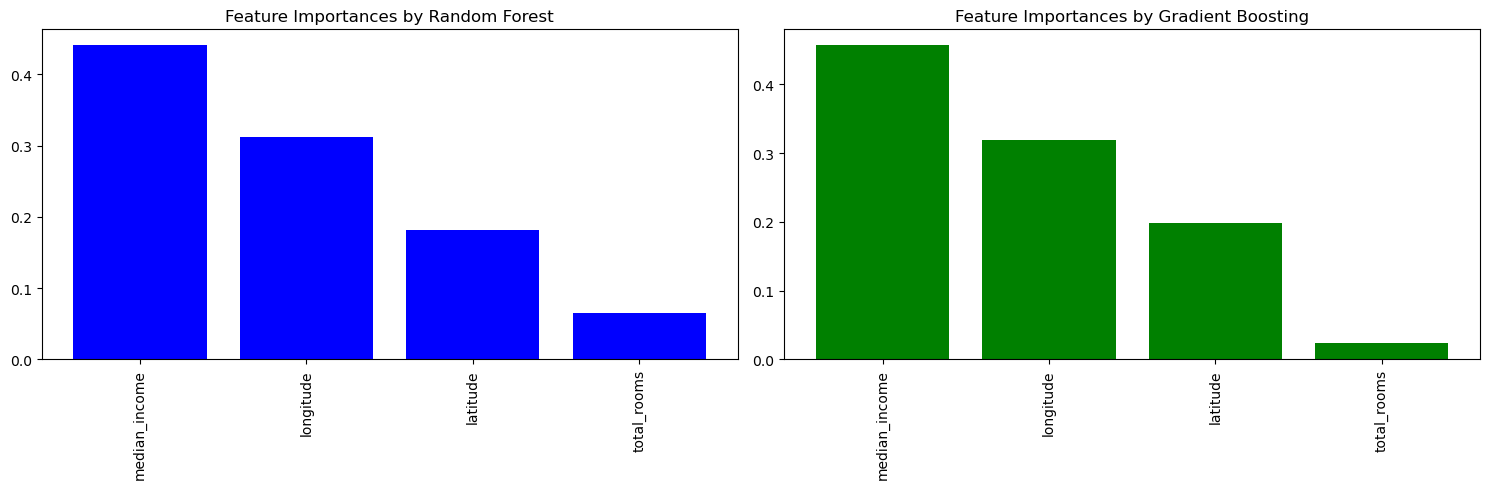

In [31]:
# Feature importance from RandomForest
importances_rf = rf_reg.feature_importances_
# Feature importance from GradientBoosting
importances_gb = gb_reg.feature_importances_

indices_rf = np.argsort(importances_rf)[::-1]
indices_gb = np.argsort(importances_gb)[::-1]

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Feature Importances by Random Forest')
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], color="blue", align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices_rf], rotation=90)

plt.subplot(122)
plt.title('Feature Importances by Gradient Boosting')
plt.bar(range(X_train.shape[1]), importances_gb[indices_gb], color="green", align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices_gb], rotation=90)

plt.tight_layout()
plt.show()
